#authors: Olga Zagovora, René Pickhardt 05.12.16 17:10

# Ex1

Given the following three documents:

$D_1$ = this is a text about web science 

$D_2$ = web science is covering the analysis of text corpora 

$D_3$ = scientific methods are used to analyze webpages 




Without applying any modeling methods just focus on the semantics of each document and decide which two Documents should be most similar. Explain why you have this opinion in a short text using less than 500 characters. 

1. How many base vectors would be needed to model the documents of this corpus?

2. What does each dimension of the vector space stand for?

3. How many dimensions does the vector space have? 

4. Create a table to map words of the documents to the base vectors.

5. Use the notation and formulas from the lecture to represent the documents as document vectors in the word vector space. You can use the term frequency of the words as coefficients. You can / should omit the inverse document frequency.

6. Calculate the cosine similarity between all three pairs of vectors.

7. According to the cosine similarity which 2 documents are most similar according to the constructed model. 


### -> Blackboard 

# Ex2, Assignment 7

### 2.1 build a generator

Count the characters and spaces in the Simple English Wikipedia dump. Let the combined
number be 𝑛 . Use the sampling method from the lecture to sample 𝑛 characters (which
could be letters or a space) from each distribution. Store the result for the generated
text for each distribution i‖n a ﬁle.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from collections import Counter
import numpy as np
import itertools
import collections
import matplotlib.cm as cm


def readWordsFromWiki(filename):
    """
        opens a file which has one sentence per line (without punction marks)
        returns a list with all words 
    """
    f = open(filename)
    allWords=[]
    for line in f:
        line = line[:-1]
        words = line.split()
        allWords.extend(words)
    return allWords

allWords = readWordsFromWiki("simple-20160801-1-article-per-line")


In [107]:
%timeit [x.lower() for x in ["A","B","C"]]
%timeit map(lambda x:x.lower(),["A","B","C"])

100000 loops, best of 3: 3.1 µs per loop
100000 loops, best of 3: 7.45 µs per loop


In [4]:
def counts2Probabilities(allWords):
    #counts of letters
    countsdict = {}
    for word in allWords:
        for letter in word:
            if letter in countsdict:
                countsdict[letter]+=1
            else:
                countsdict[letter]=1
    countsdict[' ']=len(allWords)
    #make probs from counts
    s = sum(countsdict.values())
    d2 = {k: float(v)/float(s) for k, v in countsdict.items()}
    return d2

def probabilities2cumulative(probabilities):
    d3 = {}
    s = 0
    #create cumulativ dictionary
    for k, v in probabilities.items():
        s+=v
        d3[k]=s
    return d3        


allWords=[x.lower() for x in allWords]
probabilityDictionary = counts2Probabilities(allWords)
cumulativeDictionary = probabilities2cumulative(probabilityDictionary)

In [5]:
#generator 

import operator
import bisect
import random


def generateCharacter(probabilityDictionary):
    cumulativeDictionary = probabilities2cumulative(probabilityDictionary)
    sortedCumulativeProbabilities = sorted(cumulativeDictionary.items(), key=operator.itemgetter(1))    
    borders = [x[1] for x in sortedCumulativeProbabilities]
    while True:
        r=random.random()#generate random value between 0 and 1
        #http://stackoverflow.com/questions/7281760/in-python-how-do-you-find-the-index-of-the-first-value-greater-than-a-threshold
        idx = bisect.bisect(borders,r)
        yield sortedCumulativeProbabilities[idx][0]

In [110]:
l=[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
%timeit next((l.index(n) for n in l if n > 55), len(l))
%timeit bisect.bisect(l, 55)

100000 loops, best of 3: 8.01 µs per loop
The slowest run took 6.52 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.57 µs per loop


In [6]:
def coolest_progress_bar(seq,every=10):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display
    progress = IntProgress(min=0,max=len(seq), value=0)
    progress.bar_style = 'info'
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)
    try:
        for i, item in enumerate(seq,1):
            if i== 1 or i % every == 0:
                progress.value = i
                label.value = '{index} / {size}'.format(index=i,size=len(seq))
            yield item
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = i
        label.value = str(i)

In [60]:
def gen_text(probabilityDictionary):
    #s = len(allWords)
    s=1000000
    genWords = []
    string = ""
    generator = generateCharacter(probabilityDictionary)
    for i in coolest_progress_bar(range(1,s+1), every=100000):
        while len(genWords) <  i:
            c = next(generator)    
            if c == ' ':
                if (len(string)> 0):
                    genWords.append(string)
                    string=""
            else:
                string = string + c      
    return genWords

#generate text from SEW sample probabilities 
genWords_SEW=gen_text(probabilityDictionary)

In [51]:
#save generated words
#import json
#with open("generated_SEW.json","wb") as f:
#    json.dump(genWords_SEW,f)

In [14]:
prob2={' ': 0.17840450037213465, '1': 0.004478392057619917,
       '0': 0.003671824660673643, '3': 0.0011831834225755678,
       '2': 0.0026051307175779174, '5': 0.0011916662329062454, '4': 0.0011108979455528355, '7': 0.001079651630435706,
       '6': 0.0010859164582487295, '9': 0.0026071152282516083, '8': 0.0012921888323905763, '_': 2.3580656240324293e-05,
       'a': 0.07264712490903191, 'c': 0.02563767289222365, 'b': 0.013368688579962115, 'e': 0.09688273452496411,
       'd': 0.029857183586861923, 'g': 0.015076820473031856, 'f': 0.017232219565845877, 'i': 0.06007894642873102,
       'h': 0.03934894249122837, 'k': 0.006067466280926215, 'j': 0.0018537015877810488, 'm': 0.022165129421030945,
       'l': 0.03389465109649857, 'o': 0.05792847618595622, 'n': 0.058519445305660105, 'q': 0.0006185966212395744,
       'p': 0.016245321110753712, 's': 0.055506530071283755, 'r': 0.05221605572640867, 'u': 0.020582942617121572,
       't': 0.06805204881206219, 'w': 0.013964469813783246, 'v': 0.007927199224676324, 'y': 0.013084644140464391,
       'x': 0.0014600810295164054, 'z': 0.001048859288348506}

In [15]:
prob3={' ': 0.1875, 'a': 0.03125, 'c': 0.03125, 'b': 0.03125, 'e': 0.03125, 'd': 0.03125, 'g': 0.03125, 'f': 0.03125,
       'i': 0.03125, 'h': 0.03125, 'k': 0.03125, 'j': 0.03125, 'm': 0.03125, 'l': 0.03125, 'o': 0.03125, 'n': 0.03125,
       'q': 0.03125, 'p': 0.03125, 's': 0.03125, 'r': 0.03125, 'u': 0.03125, 't': 0.03125, 'w': 0.03125, 'v': 0.03125,
       'y': 0.03125, 'x': 0.03125, 'z': 0.03125}


In [61]:
genWords_probability2=gen_text(prob2)

In [62]:
genWords_probability3=gen_text(prob3)

### 2.2 Plot the word rank frequency diagram and CDF

Count the resulting words from the provided data set and from the generated text for each
of the probability distributions. Create a word rank frequency diagram which contains
all 3 data sets. Also create a CDF plot that contains all three data sets.

#### Dataset of SEW

In [18]:
c=Counter(allWords)
words,frequencies = zip(*c.most_common())
print words[0:10], frequencies[0:10]
xvals = list(range(1,len(frequencies)+1))

('the', 'of', 'in', 'and', 'a', 'is', 'to', 'was', 'it', 'he') (1094965, 523169, 472241, 411979, 382896, 323703, 293693, 227588, 144707, 129346)


#### generated datasets

In [63]:
def countFrequencies(collection):
    c=Counter(collection)
    items,frequencies = zip(*c.most_common())
    return {"items":items,"frequencies":frequencies}

lines = {}
res = countFrequencies(genWords_SEW)
lines["unigram"]={"x":list(range(1,len(res["frequencies"])+1)),"y":res["frequencies"],"color":"r","label":ur'generated_SEW'}

lines2 = {}
res2 = countFrequencies(genWords_probability2)
lines2["unigram"]={"x":list(range(1,len(res2["frequencies"])+1)),"y":res2["frequencies"],"color":"g","label":ur'generated_prob2'}

lines3 = {}
res3 = countFrequencies(genWords_probability3)
lines3["unigram"]={"x":list(range(1,len(res3["frequencies"])+1)),"y":res3["frequencies"],
                   "color":"l","label":ur'generated_prob3'}

#### Wordrank frequency diagram

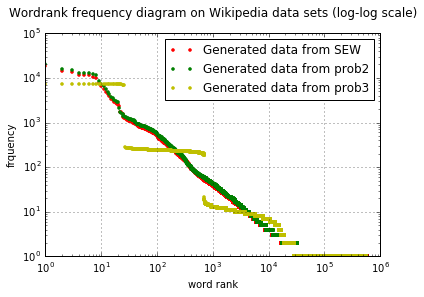

In [64]:
#plt.plot(xvals,frequencies,'b.', label = "Simple English Wikipedia")
plt.plot(lines["unigram"]["x"],lines["unigram"]["y"],'r.', label = "Generated data from SEW")
plt.plot(lines2["unigram"]["x"],lines2["unigram"]["y"],'g.', label = "Generated data from prob2")
plt.plot(lines3["unigram"]["x"],lines3["unigram"]["y"],'y.', label = "Generated data from prob3")

plt.title("Wordrank frequency diagram on Wikipedia data sets (log-log scale)",y=1.05)
plt.xlabel("word rank")
plt.ylabel("frquency")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.legend(loc ='upper right')
plt.show()

#### plot cdf

In [65]:
def makeNormedCDF(counts):
    cumsum = np.cumsum(counts)
    normedcumsum = [x/float(cumsum[-1]) for x in cumsum]
    return normedcumsum
cdf = makeNormedCDF(frequencies)
generatedCdf = makeNormedCDF(lines["unigram"]["y"])
generatedCdf2 = makeNormedCDF(lines2["unigram"]["y"])
generatedCdf3 = makeNormedCDF(lines3["unigram"]["y"])

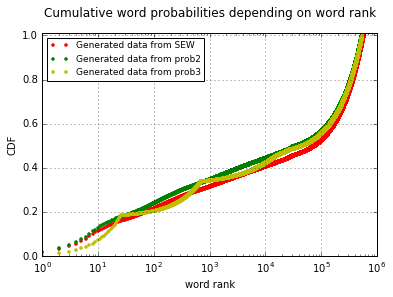

In [66]:
#plt.plot(xvals,cdf,'b.', label = "Simple English Wikipedia")
plt.plot(lines["unigram"]["x"],generatedCdf,'r.', label = "Generated data from SEW")
plt.plot(lines2["unigram"]["x"],generatedCdf2,'g.', label = "Generated data from prob2")
plt.plot(lines3["unigram"]["x"],generatedCdf3,'y.', label = "Generated data from prob3")

plt.title("Cumulative word probabilities depending on word rank",y=1.05)
plt.xlabel("word rank")
plt.ylabel("CDF")
plt.xscale("log")
plt.ylim([0,1.01])
plt.grid()
plt.legend(loc ='upper left', fontsize=9)
plt.show()

### 2.3 Which generator is closer to the original data?

Let us assume you would want to create a test corpus for some experiments. That test
corpus has to have a similar word rank frequency diagram as the original data set. Which
of the two generators would you use? You should perform the Kolmogorov Smirnov test
as discussed in the lecture by calculating the maximum pointwise distance of the CDFs.


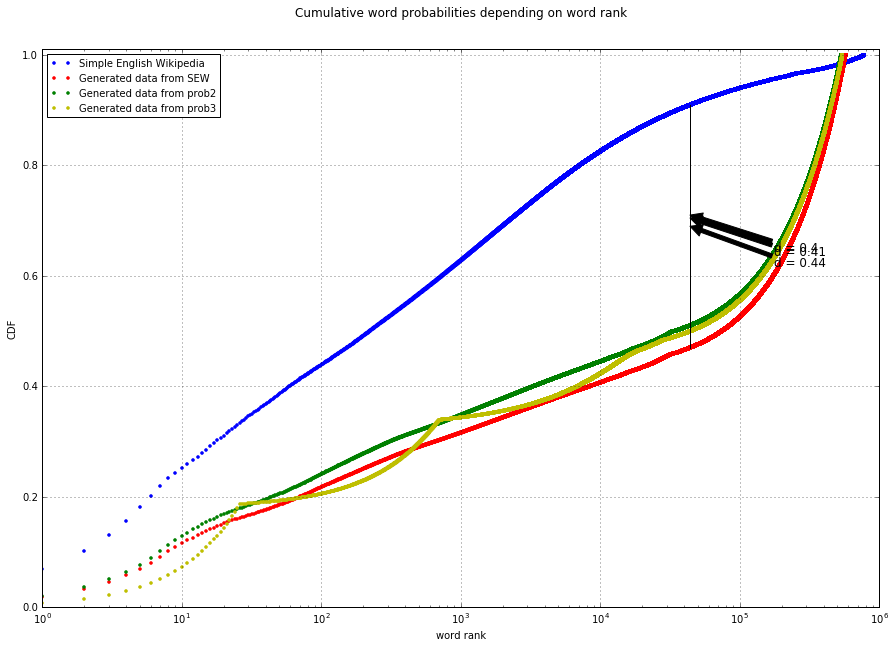

In [67]:
distances=[abs(x-y) for x,y in zip(cdf,generatedCdf)]
index, value = max(enumerate(distances), key=operator.itemgetter(1))
index2, value2 = max(enumerate([abs(x-y) for x,y in zip(cdf,generatedCdf2)]), key=operator.itemgetter(1))
index3, value3 = max(enumerate([abs(x-y) for x,y in zip(cdf,generatedCdf3)]), key=operator.itemgetter(1))

plt.figure(figsize=(15,10))
plt.plot(xvals,cdf,'b.', label = "Simple English Wikipedia")
plt.plot(lines["unigram"]["x"],generatedCdf,'r.', label = "Generated data from SEW")
plt.plot(lines2["unigram"]["x"],generatedCdf2,'g.', label = "Generated data from prob2")
plt.plot(lines3["unigram"]["x"],generatedCdf3,'y.', label = "Generated data from prob3")

plt.title("Cumulative word probabilities depending on word rank",y=1.05)
plt.xlabel("word rank")
plt.ylabel("CDF")
plt.xscale("log")
plt.ylim([0,1.01])

def plot_CDF_max_dist(idx,value_,genCdf):
    x = [idx, idx]
    y_key = genCdf[idx]
    y_major = cdf[idx]
    y = [min(y_key,y_major), max(y_key,y_major)]
    plt.plot(x,y,'k')
    distanceString = ('%.2f' % (value_,)).rstrip('0').rstrip('.')
    plt.annotate("d = " + distanceString ,
                 xy=(idx, float(y[0] + y[1] )/2 ), xytext=(idx*4, float( 2* y[0] + y[1] )/3),
                 arrowprops=dict(facecolor='black'), size=12)

plot_CDF_max_dist(index,value,generatedCdf)
plot_CDF_max_dist(index2,value2,generatedCdf2)
plot_CDF_max_dist(index3,value3,generatedCdf3)
plt.grid()
plt.legend(loc ='upper left', fontsize=10)
plt.show()

How do your results change when you generate the two text corpora for a
second or third time? What will be the values of the Kolmogorov Smirnov
test in these cases?

In [79]:
genWords_probability4=gen_text(prob2)
genWords_probability5=gen_text(prob3)

In [80]:
genWords_probability6=gen_text(probabilityDictionary)

lines6 = {}
res6 = countFrequencies(genWords_probability6)
lines6["unigram"]={"x":list(range(1,len(res6["frequencies"])+1)),"y":res6["frequencies"],"color":"r","label":ur'generated_SEW'}

lines4 = {}
res4 = countFrequencies(genWords_probability4)
lines4["unigram"]={"x":list(range(1,len(res4["frequencies"])+1)),"y":res4["frequencies"],"color":"r","label":ur'generated_prob2'}
lines5 = {}
res5 = countFrequencies(genWords_probability5)
lines5["unigram"]={"x":list(range(1,len(res5["frequencies"])+1)),"y":res5["frequencies"],"color":"r","label":ur'generated_prob3'}

generatedCdf4 = makeNormedCDF(lines4["unigram"]["y"])
generatedCdf5 = makeNormedCDF(lines5["unigram"]["y"])
generatedCdf6 = makeNormedCDF(lines6["unigram"]["y"])

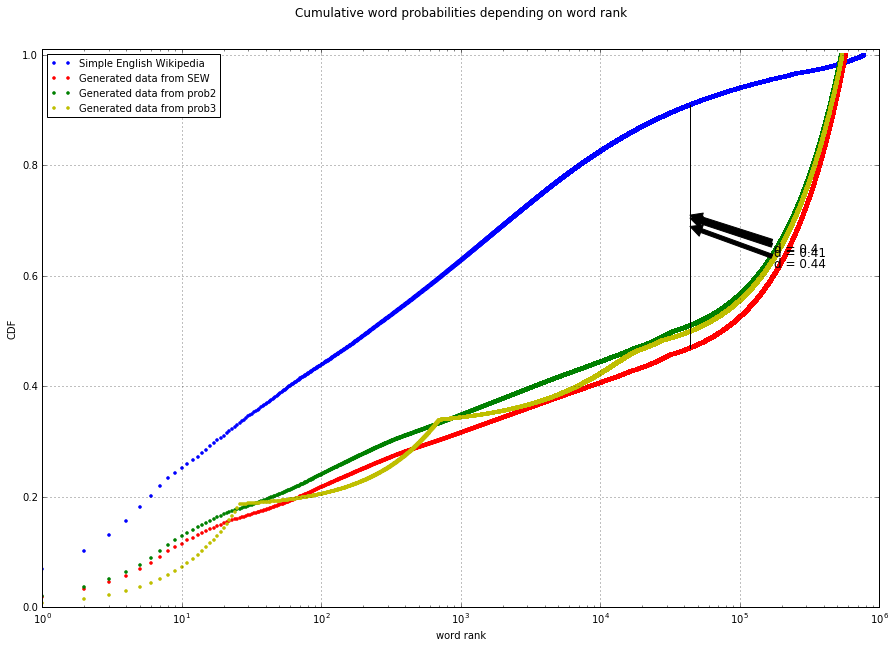

In [81]:
index4, value4 = max(enumerate([abs(x-y) for x,y in zip(cdf,generatedCdf4)]), key=operator.itemgetter(1))
index5, value5 = max(enumerate([abs(x-y) for x,y in zip(cdf,generatedCdf5)]), key=operator.itemgetter(1))
index6, value6 = max(enumerate([abs(x-y) for x,y in zip(cdf,generatedCdf6)]), key=operator.itemgetter(1))

plt.figure(figsize=(15,10))
plt.plot(xvals,cdf,'b.', label = "Simple English Wikipedia")
plt.plot(lines6["unigram"]["x"],generatedCdf6,'r.', label = "Generated data from SEW")
plt.plot(lines4["unigram"]["x"],generatedCdf4,'g.', label = "Generated data from prob2")
plt.plot(lines5["unigram"]["x"],generatedCdf5,'y.', label = "Generated data from prob3")

plt.title("Cumulative word probabilities depending on word rank",y=1.05)
plt.xlabel("word rank")
plt.ylabel("CDF")
plt.xscale("log")
plt.ylim([0,1.01])
plot_CDF_max_dist(index4,value4,generatedCdf4)
plot_CDF_max_dist(index5,value5,generatedCdf5)
plot_CDF_max_dist(index6,value6,generatedCdf6)
plt.grid()
plt.legend(loc ='upper left', fontsize=10)
plt.show()

# Dice function Ex3, Assignment 7

In [1]:
import random


def dice_rolling():
    return random.randint(1, 6)

# parameters: 
#           number_of_times - number of simulitions, 
#           number_of_dice - number of dices which are simulteniously rolled 
#function returns: 
#           dictionary with counts of particular dice sums
#           list of sums in simulations
def simulate_dice(number_of_times,number_of_dice):
    all_dice=[]
    sum_two_dice_count = {n : 0 for n in range(number_of_dice, 6*number_of_dice+1)}    
    for i in range(number_of_times):
        total=0
        for j in range(number_of_dice):
            total += dice_rolling()
        sum_two_dice_count[total] += 1
        all_dice.append(total)

    return sum_two_dice_count,all_dice

n=2
count_all,all_dice= simulate_dice(100,n) 

count_all

{2: 3, 3: 9, 4: 12, 5: 11, 6: 15, 7: 14, 8: 9, 9: 10, 10: 10, 11: 4, 12: 3}

## Histogram

Populating the interactive namespace from numpy and matplotlib


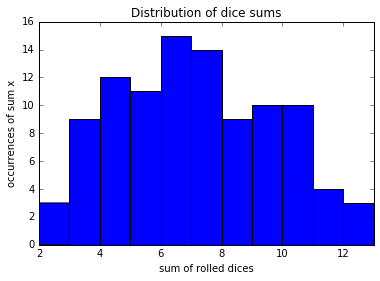

In [53]:
%pylab inline
import matplotlib.pyplot as plt

plt.figure()
plt.hist(all_dice,bins=range(n,n*6+2))
plt.ylabel("occurrences of sum x")
plt.xlabel("sum of rolled dices")
plt.xlim(n,n*6+1)
plt.title("Distribution of dice sums")
plt.show()

#n2=4
#plt.figure()
#plt.hist(simulate_dice(100,n2)[1],bins=range(n2,n2*6+1))
#plt.xlim(2,n2*6)
#plt.show()


## Commulative distibution function

In [34]:
from collections import Counter
import numpy as np

def getCDF(all_values,count_all):
    #c=Counter(all_values)
    #sum_dice,frequencies=zip(*c.most_common())
    sum_dice,frequencies=count_all.keys(),count_all.values()
    cumsum=np.cumsum(frequencies)#cumulative sum of the elements
    normedcumsum=[x/float(cumsum[-1]) for x in cumsum]#convert into normalized form
    rank={sum_dice[i]:i+1 for i in range(0,len(sum_dice))}#ranked_value:rank
    return rank,normedcumsum
rank_dice,normedcumsum_dice=getCDF(all_dice,count_all)

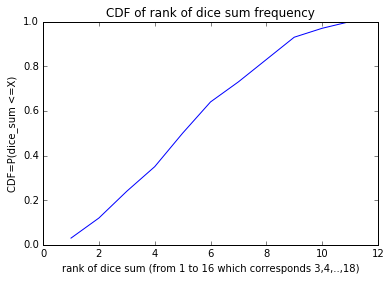

In [35]:
plt.plot(rank_dice.values(),normedcumsum_dice)
plt.xlabel("rank of dice sum (from 1 to 16 which corresponds 3,4,..,18)")
plt.ylabel("CDF=P(dice_sum <=X)")
plt.title("CDF of rank of dice sum frequency")
plt.show()

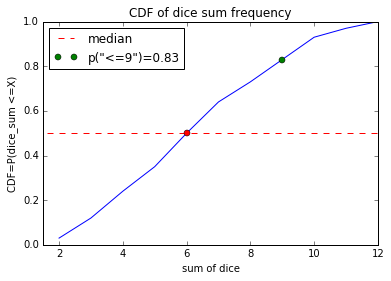

In [36]:
plt.plot(rank_dice.keys(),normedcumsum_dice)
plt.plot(range(0,13),[0.5]*13,"r--",label="median")
plt.plot(6,0.5, "ro")
plt.plot(9,normedcumsum_dice[rank_dice[9]-1],"go",label="p(\"<=9\")="+str(normedcumsum_dice[rank_dice[9]-1]))
plt.xlabel("sum of dice")
plt.ylabel("CDF=P(dice_sum <=X)")
plt.title("CDF of dice sum frequency")
plt.xlim(1.5,12)
plt.legend(loc=2)
plt.show()

### 4. Repeat the simulation a second time and compute the maximum point-wise distance of both CDFs.

In [ ]:
count_all2,all_dice2= simulate_dice(100,2) 
rank_dice2,normedcumsum_dice2=getCDF(all_dice2,count_all2)

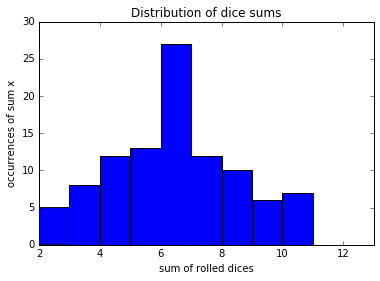

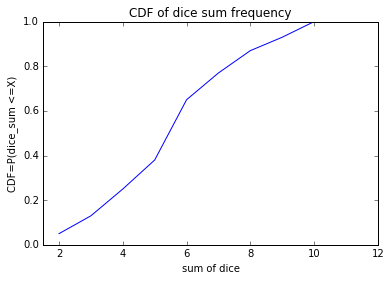

In [54]:
plt.figure()
plt.hist(all_dice2,bins=range(2,2*6+2))
plt.ylabel("occurrences of sum x")
plt.xlabel("sum of rolled dices")
plt.xlim(n,n*6+1)
plt.title("Distribution of dice sums")
plt.show()

plt.plot(rank_dice2.keys(),normedcumsum_dice2)
plt.xlabel("sum of dice")
plt.ylabel("CDF=P(dice_sum <=X)")
plt.title("CDF of dice sum frequency")
plt.xlim(1.5,12)
plt.show()

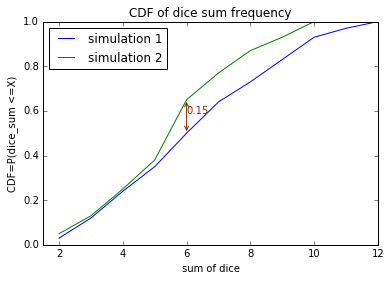

In [90]:
import operator
distances=[abs(x-y) for x,y in zip(normedcumsum_dice,normedcumsum_dice2)]
index, value = max(enumerate(distances), key=operator.itemgetter(1))#4 0.15


plt.annotate(s='', xy=(index+2,normedcumsum_dice[index]), xytext=(index+2,normedcumsum_dice2[index]),
             arrowprops=dict(facecolor=((0.549,0.176,0.0156)),
                         edgecolor=(0.549,0.176,0.0156),arrowstyle='<->'))
plt.text(index+2, 0.59, value,color=(0.549,0.176,0.0156) )
plt.plot(rank_dice.keys(),normedcumsum_dice,label="simulation 1")
plt.plot(rank_dice2.keys(),normedcumsum_dice2,label="simulation 2")
plt.xlabel("sum of dice")
plt.ylabel("CDF=P(dice_sum <=X)")
plt.title("CDF of dice sum frequency")
plt.xlim(1.5,12)
plt.legend(loc=2)
plt.show()

### 5. Now repeat the simulation (2 times) with n=1000 and compute the maximum point-wise distance of both CDFs.

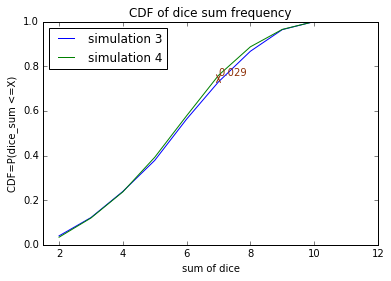

In [96]:
count_all3,all_dice3= simulate_dice(1000,2) 
rank_dice3,normedcumsum_dice3=getCDF(all_dice3,count_all3)

count_all4,all_dice4= simulate_dice(1000,2) 
rank_dice4,normedcumsum_dice4=getCDF(all_dice4,count_all4)



import operator
distances2=[abs(x-y) for x,y in zip(normedcumsum_dice3,normedcumsum_dice4)]
index2, value2 = max(enumerate(distances2), key=operator.itemgetter(1))


plt.annotate(s='', xy=(index2+2,normedcumsum_dice3[index2]), xytext=(index2+2,normedcumsum_dice4[index2]),
             arrowprops=dict(facecolor=((0.549,0.176,0.0156)),
                         edgecolor=(0.549,0.176,0.0156),arrowstyle='<->'))
plt.text(index2+2, normedcumsum_dice4[index2], value2,color=(0.549,0.176,0.0156) )
plt.plot(rank_dice.keys(),normedcumsum_dice3,label="simulation 3")
plt.plot(rank_dice2.keys(),normedcumsum_dice4,label="simulation 4")
plt.xlabel("sum of dice")
plt.ylabel("CDF=P(dice_sum <=X)")
plt.title("CDF of dice sum frequency")
plt.xlim(1.5,12)
plt.legend(loc=2)
plt.show()

### 6. What conclusion can you draw from increasing the number of steps in the simulation?